In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# **A Separable Classication Problem**

In [2]:
# generate fake data that is linearly separable with a margin epsilon given the data
def getfake(samples, dimensions, epsilon):
    wfake = torch.normal(0.0,1.0,size=(dimensions,)) # fake weight vector for separation
    bfake = torch.normal(0.0,1.0,size=(1,)) # fake bias
    wfake = wfake / torch.norm(wfake) # rescale to unit length
    # making some linearly separable data, simply by chosing the labels accordingly
    X = torch.zeros(size=(samples, dimensions))
    Y = torch.zeros(size=(samples,))
    i = 0
    while (i < samples):
        tmp = torch.normal(0.0, 1.0, size=(1,dimensions))
        margin = torch.matmul(tmp, wfake) + bfake
        if (torch.norm(tmp).item() < 3) & (abs(margin.item()) > epsilon):
            X[i,:] = tmp[0]
            Y[i] = 1 if margin.item() > 0 else -1
            i += 1
    return X, Y

X, Y = getfake(50,2,0.3)

In [3]:
# plot the data with colors chosen according to the labels
def plotdata(X,Y):
    for (x,y) in zip(X,Y):
        if (y.item() == 1):
            plt.scatter(x[0].item(), x[1].item(), color='r')
        else:
            plt.scatter(x[0].item(), x[1].item(), color='b')
# plot contour plots on a [-3,3] x [-3,3] grid
def plotscore(w,d):
    xgrid = np.arange(-3, 3, 0.02)
    ygrid = np.arange(-3, 3, 0.02)
    xx, yy = np.meshgrid(xgrid, ygrid)
    zz = torch.zeros(size=(xgrid.size, ygrid.size, 2))
    zz[:,:,0] = torch.tensor(xx)
    zz[:,:,1] = torch.tensor(yy)
    vv = torch.matmul(zz,w) + d
    CS = plt.contour(xgrid,ygrid,vv.numpy())
    plt.clabel(CS, inline=1, fontsize=10)

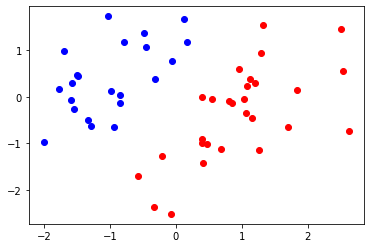

In [4]:
X, Y = getfake(50, 2, 0.3)
plotdata(X,Y)
plt.show()

# **Perceptron Implementation**

Encountered an error and updated parameters
data [0.9554115 0.6014452], label 1.0
weight [0.9554115 0.6014452], bias [1.]


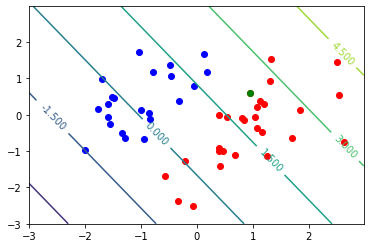

Encountered an error and updated parameters
data [0.17336673 1.1854022 ], label -1.0
weight [ 0.78204477 -0.58395696], bias [0.]


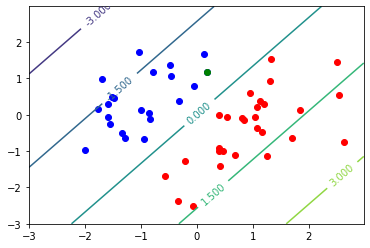

In [5]:
def perceptron(w,b,x,y):
    if (y * (torch.matmul(w, x) + b)).item() <= 0:
        w += y * x
        b += y
        return 1
    else:
        return 0
w = torch.zeros(size=(2,))
b = torch.zeros(size=(1,))
# print(X.shape)
for (x,y) in zip(X,Y):
    res = perceptron(w,b,x,y)
    if (res == 1):
        print('Encountered an error and updated parameters')
        print('data {}, label {}'.format(x.numpy(), y.numpy()))
        print('weight {}, bias {}'.format(w.numpy(), b.numpy()))
        plotscore(w, b)
        plotdata(X,Y)
        plt.scatter(x[0].item(), x[1].item(), color='g')
        plt.show()


# **Perceptron Convergence in Action**

In [6]:
Eps = np.arange(0.025, 0.45, 0.025)
Err = np.zeros(shape=(Eps.size))
for j in range(10):
    for (i,epsilon) in enumerate(Eps):
        X, Y = getfake(1000, 2, epsilon)
        for (x,y) in zip(X,Y):
            Err[i] += perceptron(w,b,x,y)
Err = Err / 10.0

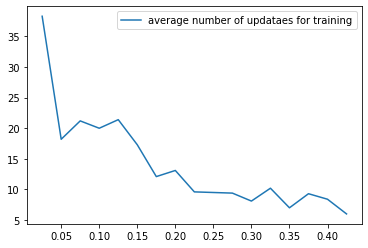

In [7]:
plt.plot(Eps, Err, label = 'average number of updataes for training')
plt.legend()
plt.show()